In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split
print("DONE")

DONE


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
from sklearn.datasets import load_boston
X = load_boston().data
Y = load_boston().target
df=pd.DataFrame(X)

In [7]:
print(df.shape)

(506, 13)


In [8]:
#some intuition
df[13]=df[10]//df[12]  #here we set a column 13 such that df[13]=Boston_data['Medv']//Boston_data['B']
X=df.to_numpy()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,3.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,4.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,6.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,3.0


In [9]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

df_train=pd.DataFrame(X_train)
df_train['price']=Y_train

x_test=np.array(X_test)
y_test=np.array(Y_test)

(339, 14)
(167, 14)
(339,)
(167,)


In [10]:
W,B,iteration,lr_rate,k=np.zeros(shape=(1,14)),0,1000,0.01,10 #intialise W and B to zero

while iteration>=0:
    w,b,temp_vectors,temp_intercept=W,B,np.zeros(shape=(1,14)),0
    data=df_train.sample(25) #sampling random k=batch size=10 data
    x=np.array(data.drop('price',axis=1))
    y=np.array(data['price'])
    
    for i in range(k):
        temp_vectors+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        temp_intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
        
    W=(w-lr_rate*(temp_vectors)/k)
    B=(b-lr_rate*(temp_intercept)/k)
    
    iteration-=1

In [11]:
print(W)
print(B)

[[-1.4270414   0.11875003 -0.53426839  0.20755808 -1.57798136  2.41321929
   0.19504314 -2.39328922  2.26165059 -1.18779472 -2.73551125  0.98991381
  -1.62114869  3.04083869]]
[22.50205285]


In [12]:
y_pred=[]
for i in range(len(x_test)):
    y=np.asscalar(np.dot(W,x_test[i])+B)
    y_pred.append(y)
    

In [13]:
MSE_lr=mean_squared_error(y_test,y_pred)
print('mean squared error =',MSE_lr)

mean squared error = 21.60419170779092


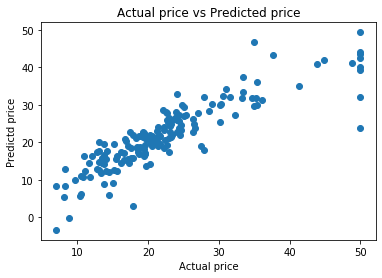

In [14]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

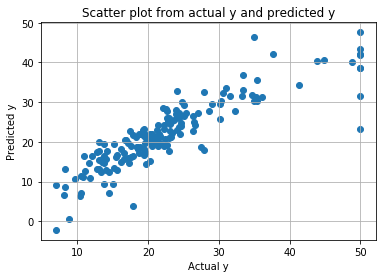

Mean Squared Error : 21.617364567315395


In [15]:
# SkLearn SGD classifier
n_iter=1000
clf = SGDRegressor(max_iter=n_iter)
clf.fit(X_train, Y_train)
y_pred_sgd=clf.predict(x_test)
plt.scatter(y_test,y_pred_sgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sgd))

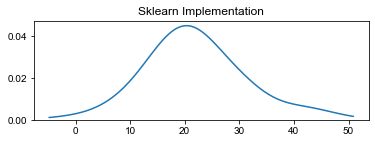

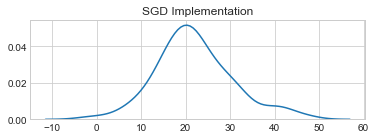

In [16]:
plt.figure(1)
# Implemented sklearn
plt.subplot(211)
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5)
plt.title('Sklearn Implementation')
plt.show()
# Implemented SGD
plt.subplot(212)
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred_sgd))
plt.title('SGD Implementation')
plt.show()